In [ ]:
#Step 1 Import Libraries

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [ ]:
#Step-2 Load data

In [6]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()
     

In [7]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape
     

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
y_train[0]

9

In [10]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

In [11]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

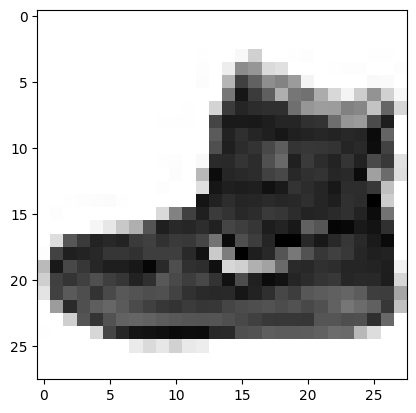

In [12]:
plt.imshow(X_train[0],cmap='Greys')

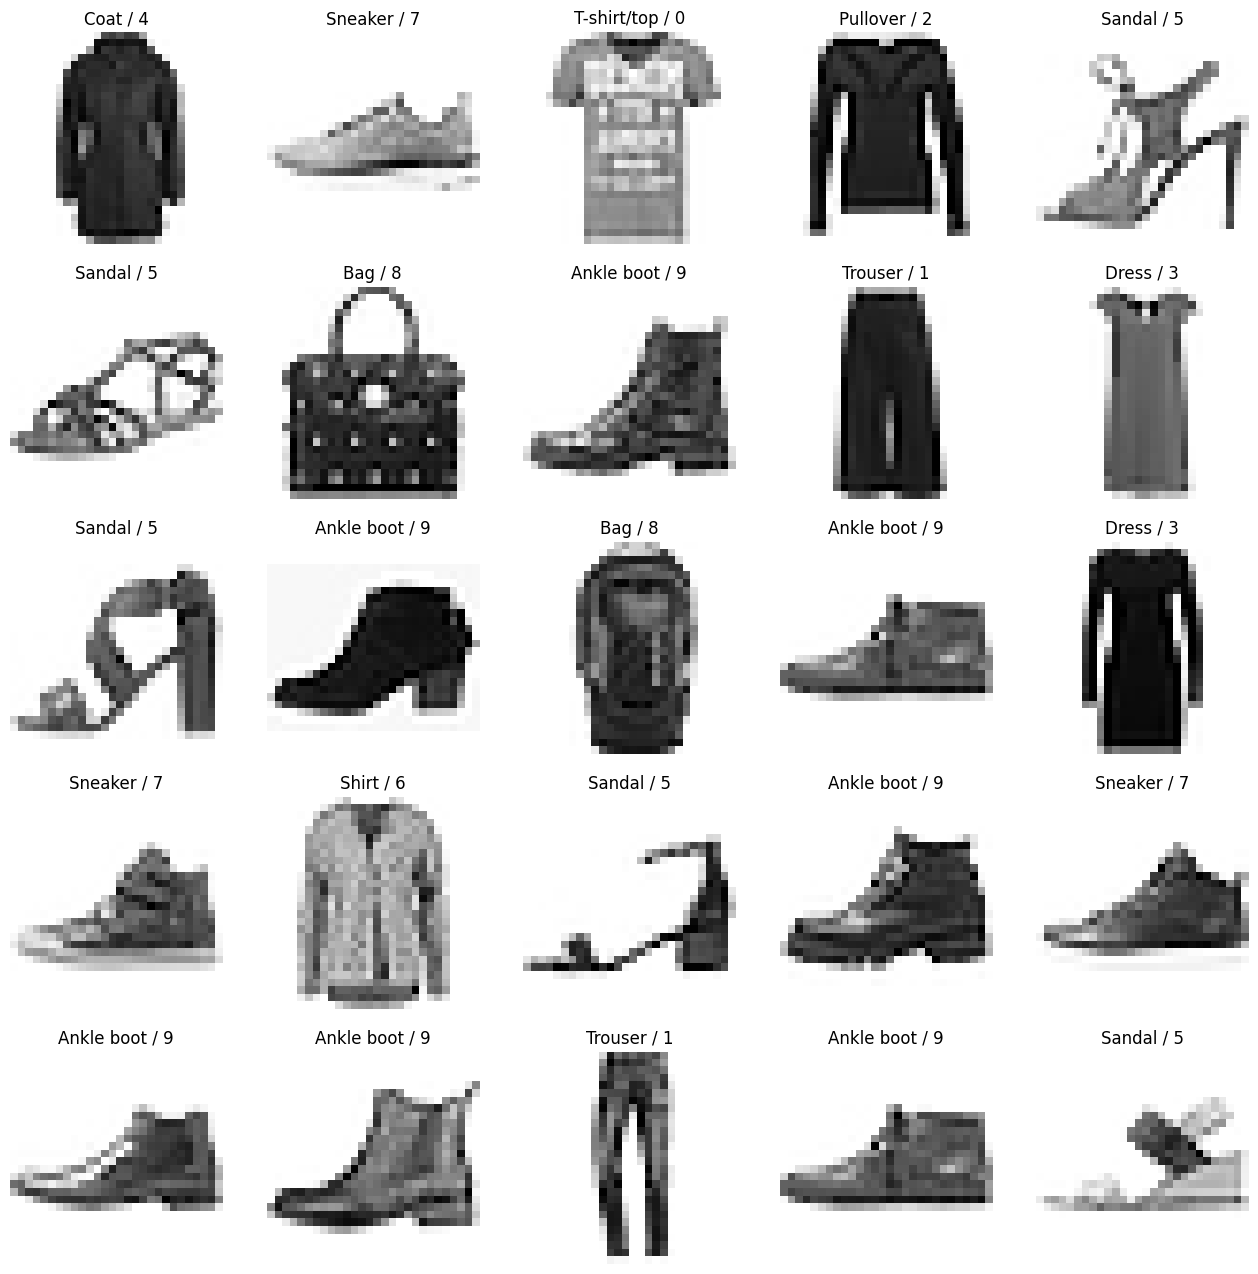

In [13]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [14]:
X_train.ndim

3

In [15]:
X_train = np.expand_dims(X_train,-1)

In [16]:
X_train.ndim

4

In [17]:
X_test=np.expand_dims(X_test,-1)

In [18]:
X_train = X_train/255
X_test= X_test/255

In [19]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [20]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [ ]:
#Step 3 Building CNN Model

In [22]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 29s 291ms/step - loss: 0.6221 - accuracy: 0.7887 - val_loss: 0.4273 - val_accuracy: 0.8496
Epoch 2/10
94/94 [==============================] - 26s 273ms/step - loss: 0.3899 - accuracy: 0.8659 - val_loss: 0.3817 - val_accuracy: 0.8692
Epoch 3/10
94/94 [==============================] - 28s 293ms/step - loss: 0.3469 - accuracy: 0.8791 - val_loss: 0.3540 - val_accuracy: 0.8777
Epoch 4/10
94/94 [==============================] - 28s 299ms/step - loss: 0.3131 - accuracy: 0.8895 - val_loss: 0.3243 - val_accuracy: 0.8886
Epoch 5/10
94/94 [==============================] - 28s 299ms/step - loss: 0.2921 - accuracy: 0.8982 - val_loss: 0.3137 - val_accuracy: 0.8909
Epoch 6/10
94/94 [==============================] - 28s 297ms/step - loss: 0.2765 - accuracy: 0.9012 - val_loss: 0.2964 - val_accuracy: 0.8970
Epoch 7/10
94/94 [==============================] - 27s 284ms/step - loss: 0.2580 - accuracy: 0.9095 - val_loss: 0.2935 - val_accuracy: 0.8977

In [26]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 3s 8ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.13, 0.07, 0.01]], dtype=float32)

In [27]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2822 - accuracy: 0.8964


[0.28222596645355225, 0.896399974822998]

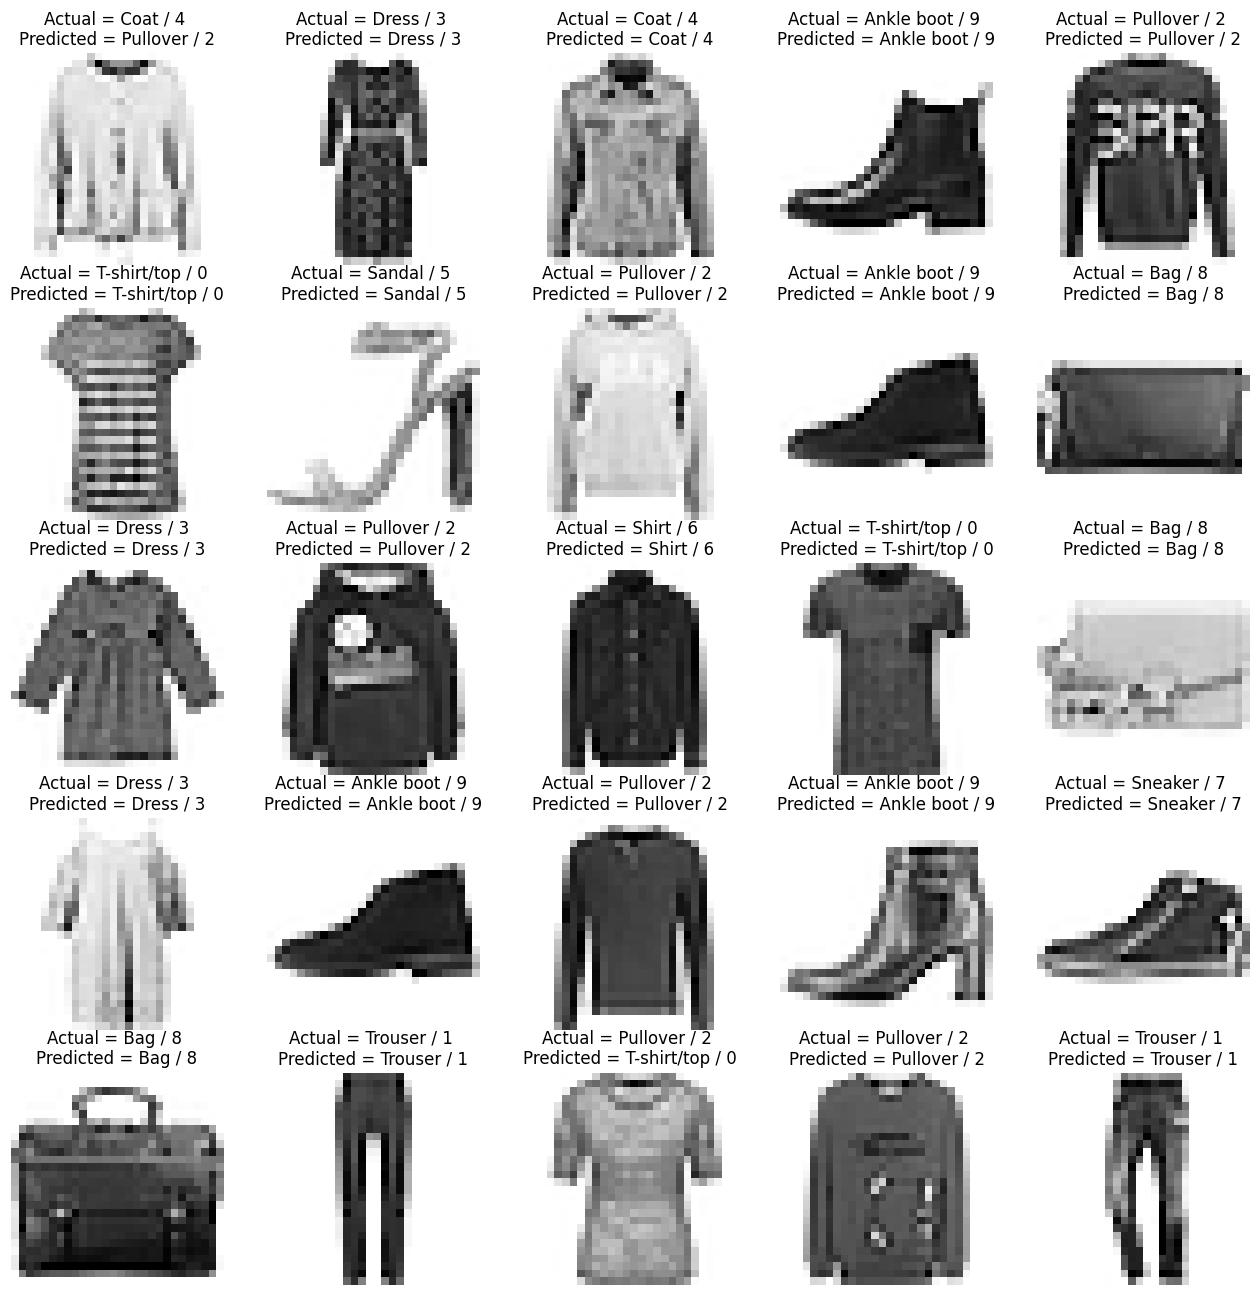

In [29]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

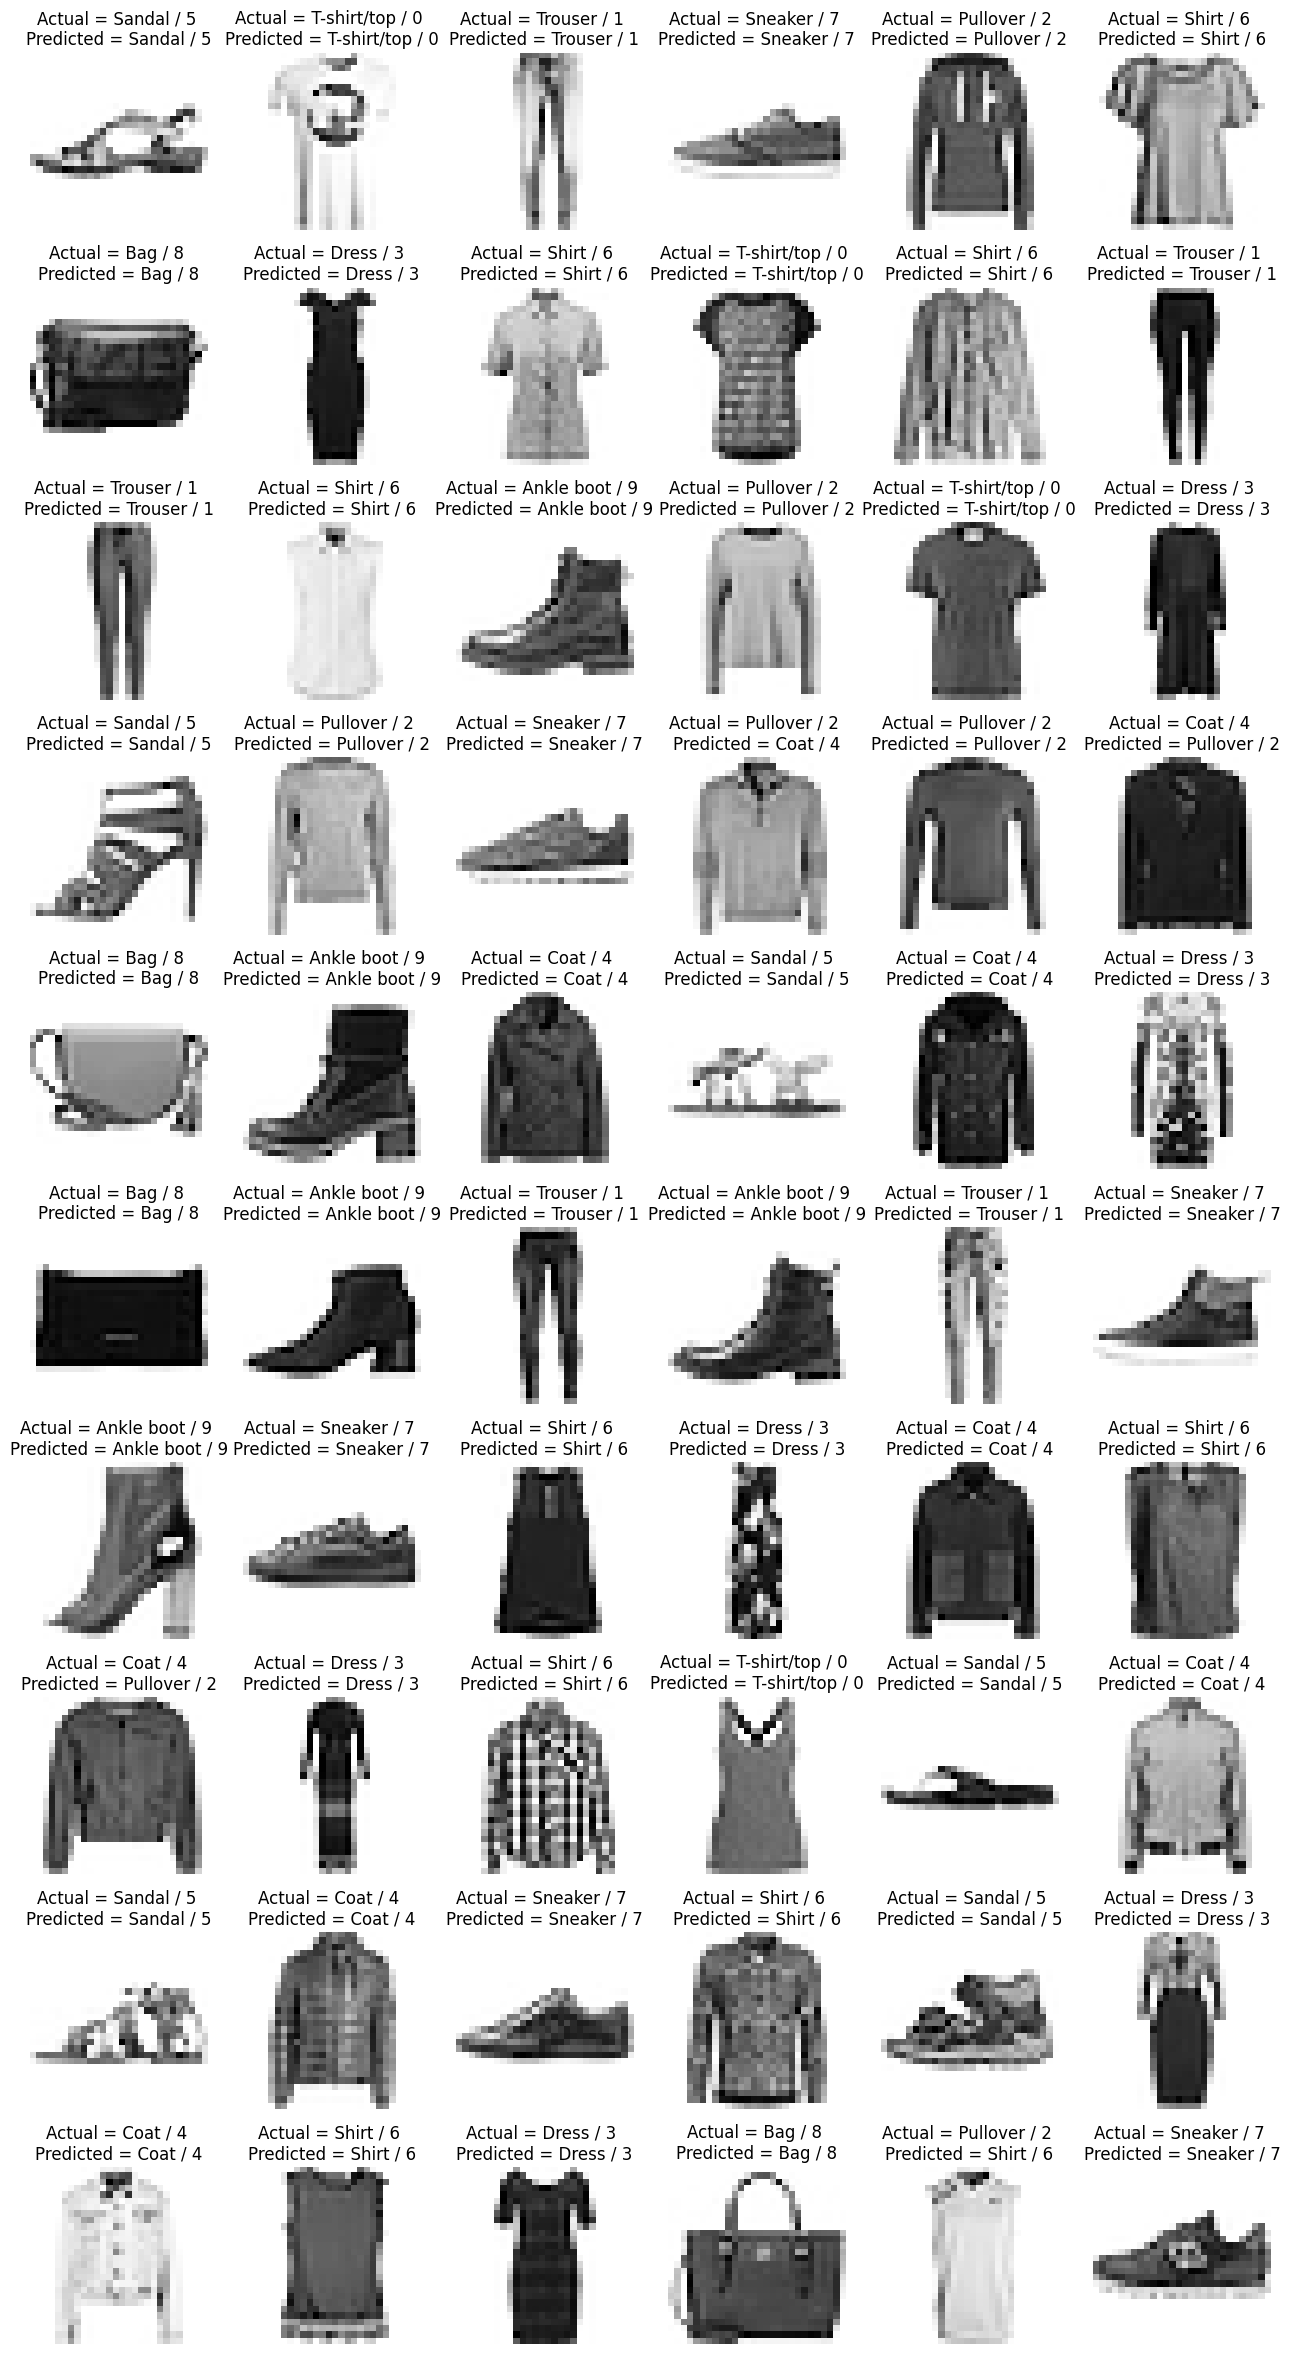

In [30]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [31]:
"""## Confusion Matrix"""

'## Confusion Matrix'

In [32]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1600x900 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.81      0.87      0.84      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.87      0.80      0.83      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.74      0.69      0.71      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



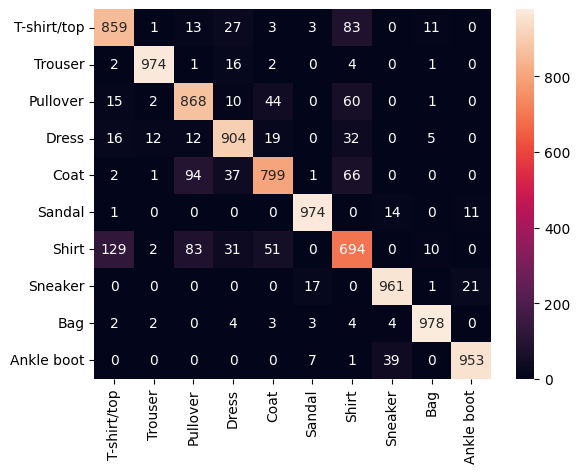

In [33]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [34]:
"""# Save Model"""

'# Save Model'

In [35]:
model.save('fashion_mnist_cnn_model.h5')

In [36]:
#Build 2 Complex CNN

In [ ]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')
 
"""######## very complex model"""
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)

Epoch 1/20
94/94 [==============================] - 36s 362ms/step - loss: 1.0231 - accuracy: 0.6176 - val_loss: 0.5832 - val_accuracy: 0.7732
Epoch 2/20
94/94 [==============================] - 34s 363ms/step - loss: 0.5386 - accuracy: 0.7985 - val_loss: 0.4524 - val_accuracy: 0.8319
Epoch 3/20
94/94 [==============================] - 34s 362ms/step - loss: 0.4461 - accuracy: 0.8366 - val_loss: 0.3964 - val_accuracy: 0.8527
Epoch 4/20
94/94 [==============================] - 35s 371ms/step - loss: 0.3929 - accuracy: 0.8588 - val_loss: 0.3628 - val_accuracy: 0.8643
Epoch 5/20
94/94 [==============================] - 35s 371ms/step - loss: 0.3601 - accuracy: 0.8701 - val_loss: 0.3539 - val_accuracy: 0.8658
Epoch 6/20
94/94 [==============================] - 34s 360ms/step - loss: 0.3392 - accuracy: 0.8737 - val_loss: 0.3270 - val_accuracy: 0.8802
Epoch 7/20
94/94 [==============================] - 33s 351ms/step - loss: 0.3170 - accuracy: 0.8829 - val_loss: 0.3120 - val_accuracy: 0.8837